In [1]:
# This is an example snippet! You could try to reuse the code through snippets extension.
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
# I've added the snippets.json of this file in Github. You may download and reuse the code below.

This jupyter notebook is aiming at providing some programming skill for beginners.   

# My first machine learning project

### Author : Niko Pang

When you start to code your own machine learning project, the first thing is to import relevant packages. At the beginning you will usually be scared when you see the adult-level code: they actually import so many packages!
Feel free for that. You will never need to scrutinize all the command when you begin to code. You can just import packages whenever you need them. 

Press M to write some comments, and use multiple # to indicate the title. Use two null bytes at the end of the paragraph or `<br>` to change to another line. You may also try *Incline*, **Bold**, $ LaTeX $ .   
*See more markdown command in http://xianbai.me/learn-md/article/syntax/paragraphs-and-line-breaks.html*  

If you meet some problems, try to breath and describe it clearly, then search it in Google. You will always get the correct answer within the 20 page results.  

If you want to control the size and font of the markdown accurately,<font/><br>you may try </font><font color=#FF0000 size=2 face="Times New Roman">this way.
    

<div class="alert alert-block alert-info"><b>Tip:</b> Use blue boxes (alert-info) for tips and notes. If it’s a note, you don’t have to include the word “Note”. See 
    https://github.com/parulnith/10-Simple-hacks-to-speed-up-your-Data-Analysis-in-Python 
</div>

In [2]:
# But some basic packages you need to import, which will help you to load data.
import numpy as np
# from tabulate import tabulate   # You can also use this package for pro data vasualization.

import matplotlib.pyplot as plt      
# Note:if you use `%matplotlib inline`, you do not need to `plt.show()` everytime.

import pandas as pd  
pd.set_option('max_colwidth',800)
import pandas_profiling

# If you want to time your program, you can ctrl+/ to activate the time package
# import time




When people think of machine learning, they often think of a program that is taking in data and spitting out predictions and insights. The process of performing machine learning often requires many more steps before and after the predictive analytics.

We try to think of the Machine Learning process as:

* Formulating a Question
* Finding and Understanding the Data
* Cleaning the Data and Feature Engineering
* Choosing a Model
* Tuning and Evaluating
* Using the Model and Presenting Results
* More cutting-edge content  

See more in https://www.codecademy.com/articles/the-ml-process


# Common steps

## Find your imperial question

We are interested in finding the forecast model to predict bank loss when default happens.  
It is a supervised learning problem, see  

https://scikit-learn.org/stable/supervised_learning.html  
  
for all possible ML algorithms we could use here.  

**This tutorial uses sklearn - 0.23.2 version.**


##  Find data

Finding relative data is the first step for your project or research. On quantity side, it's always great to find huge quantity data. For the normal machine learning case, it's appropriate to have 1000+ data.  

If you want to do something fancy, you can collect your own data. As machine learning needs so much data, usually you need to study beautifulsoup and some web crawler skills

But in dimension side, even with the help of auto-algorithms to delete the unnecessary data, I still urge you not to have too much dimension(like 1000+) due to your computer capacity. Actually you can do that if you graduate from kindergarten and get the hand of cloud computing or parallel computing.

In [3]:
# load/Save local data
# pd.read_csv
# pd.read_excel
# pd.read_stata
# pd.read_sql

# data.to_csv('Result.csv')
# data.to_excel('Result.xlsx')
# and others …

# print pd. then use tab to check the optional and its 

It's okay if you download data and preprocess it in excel or other software. But in case that you need data from URL, it's convenient if you can input data without download to your local computer and proprecess it in Python.

Since not all of the website provide data API,let's use an local data case.

In [4]:
df = pd.read_excel('Banking_loss_events.xlsx')
df
# You can also check the data via 'df.head()' ,'df.tail()','tabulate(df) (need imported package)' or other methods.

,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,83035.4756,291100,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,27116.4657,98400,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,59642.7988,230700,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,34481.3225,137400,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,90569.7271,288300,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,EMEA,Trading and Sales,z-LE-385,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-11-15,2013-11-17,2013,952743.86,285823.1580,952800,30.0
1398,EMEA,Trading and Sales,z-LE-538,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-01-24,2014-01-25,2014,122813.21,42984.6235,132200,35.0
1399,North America,Trading and Sales,z-LE-567,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-03-23,2014-03-26,2014,949052.11,208791.4642,946400,22.0
1400,Asia Pac,Retail Banking,z-LE-600,Rejected,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-06-19,2014-06-20,2014,230710.76,18456.8608,232300,8.0


## Explore data 

You can use package `qgrid` to quickly screen the data subset. 

In [5]:
import qgrid
# This is an useful package for first-step screen. See https://github.com/quantopian/qgrid

for qgrid_functions in dir(qgrid):
    print(qgrid_functions)   # show the inside function callable in qgrid

# other important command for qgrid
# qgrid.nbinstall(overwrite=True)
# qgrid.set_defaults(remote_js=True, precision=2)

QGridWidget
QgridWidget
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
__version__
_jupyter_nbextension_paths
_version
disable
enable
grid
off
on
set_defaults
set_grid_option
show_grid
version_info


In [6]:
df_qgrid = qgrid.show_grid(df, show_toolbar=True)
df_qgrid
# qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [7]:
df_qgrid.get_changed_df()

# If you change the data in qgrid_excel above, do save it as
# df = df_qgrid.get_changed_df()

,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,83035.4756,291100,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,27116.4657,98400,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,59642.7988,230700,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,34481.3225,137400,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,90569.7271,288300,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,EMEA,Trading and Sales,z-LE-385,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-11-15,2013-11-17,2013,952743.86,285823.1580,952800,30.0
1398,EMEA,Trading and Sales,z-LE-538,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-01-24,2014-01-25,2014,122813.21,42984.6235,132200,35.0
1399,North America,Trading and Sales,z-LE-567,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-03-23,2014-03-26,2014,949052.11,208791.4642,946400,22.0
1400,Asia Pac,Retail Banking,z-LE-600,Rejected,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-06-19,2014-06-20,2014,230710.76,18456.8608,232300,8.0


In [8]:
# After firstly scaling and screening the data, we use pandas_profiling package to check the data deeply.
# Then we'll decide what to do next. 
# Please activate the following code when you run this project at first time.

# df.profile_report()

In [9]:
# By the way, exporting the data report is also possible, if you don't want to see it in jupyter.
# profile = df.profile_report(title='Pandas Profiling Report')  
# profile.to_file("Banking data profiling.html")

## Normal data exploration: similar steps in pandas

Note that you can also implement the similar functions in pandas. But I just don't like it because it is too slow and usually not that professional.  
If you have the same preference or you just want to excel this part and load back, just skip this 1.3 section.   

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     1402 non-null   object        
 1   Business                   1402 non-null   object        
 2   Name                       1402 non-null   object        
 3   Status                     1402 non-null   object        
 4   Risk Category              1402 non-null   object        
 5   Risk Sub-Category          1402 non-null   object        
 6   Discovery Date             1402 non-null   datetime64[ns]
 7   Occurrence Start Date      1402 non-null   datetime64[ns]
 8   Year                       1402 non-null   int64         
 9   Net Loss                   1402 non-null   float64       
 10  Recovery Amount            1402 non-null   float64       
 11  Estimated Gross Loss       1402 non-null   int64         
 12  Recove

Ooops, we have plenty of 'object' features, which means they contain text and cannot put into our model directly. We need to do some transformation accordingly.  

Let's check the description statistics for numerical variables.

In [11]:
df.describe()

,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
count,1402.000000,1.402000e+03,1.402000e+03,1.402000e+03,1402.000000
mean,2011.019971,3.618860e+05,1.026123e+05,3.716211e+05,29.596291
std,2.239009,1.102039e+06,2.885603e+05,1.108328e+06,6.483356
min,2007.000000,-4.993440e+03,-1.947442e+03,-7.700000e+03,5.000000
25%,2009.000000,8.569924e+04,2.371198e+04,9.130000e+04,25.000000
50%,2011.000000,1.735251e+05,4.909423e+04,1.774000e+05,30.000000
75%,2013.000000,2.677119e+05,8.375998e+04,2.753000e+05,35.000000
max,2014.000000,1.168786e+07,3.774000e+06,1.169800e+07,40.000000


array([[<AxesSubplot:title={'center':'Estimated Gross Loss'}>,
        <AxesSubplot:title={'center':'Net Loss'}>],
       [<AxesSubplot:title={'center':'Recovery Amount'}>,
        <AxesSubplot:title={'center':'Recovery Amount (percent)'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

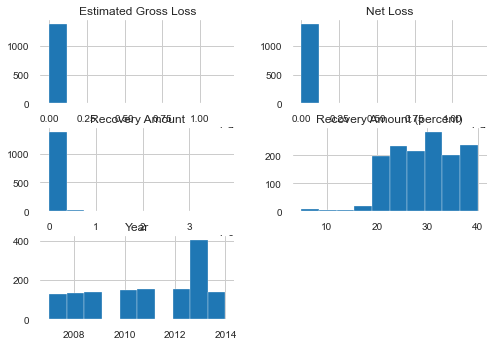

In [12]:
df.hist()
# only provides the bar charts for all numerical features in data 

In [13]:
df['Region'].unique()
# For catagorical feature, check how much catagories it has. 

array(['EMEA', 'North America', 'Asia Pac'], dtype=object)

Here we list some other useful operation when you are doing your own data project.  
Following links are cheat-sheets from DataCamp, which will help you Get through this difficulty:    
https://datacamp-community-prod.s3.amazonaws.com/50d31142-3de0-4159-89b9-18b718a728ef   
https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8

In [14]:
# Select the column 'Net Loss' with Series type
print(df['Net Loss'])
# Select the column 'Net Loss' with DataFrame type
print(df[['Net Loss']])
# Choose two columns with DataFrame type. Please note that there must be two square brackets
df[['Net Loss','Recovery Amount']]
# The column order will be returned according to the input order,
# you can change the column order via this code:
df1 = df[['Year', 'Occurrence Start Date']]
# Quickly select multiple rows (note that single row selection is not supported):
print(df1[:100])
# You can combine these method
df1[['Occurrence Start Date','Year']][:100]

0       296555.27
1        87472.47
2       229395.38
3       137925.29
4       292160.41
          ...    
1397    952743.86
1398    122813.21
1399    949052.11
1400    230710.76
1401    240558.72
Name: Net Loss, Length: 1402, dtype: float64
       Net Loss
0     296555.27
1      87472.47
2     229395.38
3     137925.29
4     292160.41
...         ...
1397  952743.86
1398  122813.21
1399  949052.11
1400  230710.76
1401  240558.72

[1402 rows x 1 columns]
    Year Occurrence Start Date
0   2007            2007-01-02
1   2007            2007-01-05
2   2007            2007-01-06
3   2007            2007-01-11
4   2007            2007-01-14
..   ...                   ...
95  2007            2007-10-07
96  2007            2007-10-08
97  2007            2007-10-13
98  2007            2007-10-15
99  2007            2007-10-18

[100 rows x 2 columns]


,Occurrence Start Date,Year
0,2007-01-02,2007
1,2007-01-05,2007
2,2007-01-06,2007
3,2007-01-11,2007
4,2007-01-14,2007
...,...,...
95,2007-10-07,2007
96,2007-10-08,2007
97,2007-10-13,2007
98,2007-10-15,2007


## Data Preprocessing

Normal steps:

1. Dealing with missing data
    - Identifying missing values in tabular data
    - Eliminating samples or features with missing values
    - Imputing missing values
    - Understanding the scikit-learn estimator API  
  
  
2. Handling categorical data]
    - Nominal and ordinal features
    - Mapping ordinal features
    - Encoding class labels
    - Performing one-hot encoding on nominal features
  
   
3. Partitioning a dataset into a separate training and test set  

  
4. Bringing features onto the same scale
  
  
5. Selecting meaningful features
    - L1 and L2 regularization as penalties against model complexity]
    - A geometric interpretation of L2 regularization
    - Sparse solutions with L1 regularization
    - Sequential feature selection algorithms
   
   
   
6. Assessing feature importance with Random Forests

### Artificial Preprocessing

Let's go back to our data_profile report. We are gonna solve the question listed here one by one.  
We recommend you to spend at least 3 minutes in this report, because this step contains too many objective factors and crucial for the accuracy and interpretability of the final model.

In [15]:
from IPython.display import IFrame
IFrame('Banking data profiling.html', width=800, height=450)

Our data contains 13 features, 6 are categories, 5 are numbers, 2 are dates. The report gives us some warnings. Now let's analyze these problems.  
  
1. Our data has no missing values, which means we don't need to `df.fillna()`. It is the only good news.  

   
2. There exists one duplicate row. After checking background we are convinced that we should delete this data. We can use `df.drop_duplicates` to carry out.  

    
3. You can see the high correlation between two groups of variables:`Recovery Amount + Net Loss + Estimated Gross Loss`, `Risk Sub-Category + Risk Category`.  We should check them and decide to easily delete or use some dimension reduction method(PCA, Lasso, etc) here.    
    
    Note: We must avoid pure collinearity in y variable. Although X features' multicollinearity is allowed in particular machine learning models, it is always a dominate strategy to treat them beforehand. Here we don't have a large set of features, so we can just simply delete some of them instead of using feature engineering methods.   
  
  
4. `Name` has a high cardinality. If some category features have too many categories, it is very difficult to get one-hot coding(transfer to multiple 01 variables) later. 
   
   `Name` here is an unstructured data. We can just waive it, or try something else objectively. 
  
   
5. For date_time features, usually we need to check if it's better to subtract them and extract the useful time length. You can recheck in `qgrid` table. Here the data labels are Discover Date and Occurrence Start Date. Also notice that we've already had the `Year` feature. So it is necessary to make a concrete analysis based on the facts of background and data.   
  
  
6. For continuous numerical features, we can still do some transformation here. If you want to make your model more robust, you can conduct discretization and get category features. Also, you can make up some objective feature with strong intuition meaning or good performance. We don't need this step here.

In [16]:
# 1. delete duplicate data

df = df.drop_duplicates()
# After you drop the data, remember to re-index to fill the blank.
index = list(np.arange(len(df)))
df['index'] = index
df = df.sort_values(by=['index'], ascending=(True))
df.set_index('index',inplace=True)
df

C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
index,,,,,,,,,,,,,
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,83035.4756,291100,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,27116.4657,98400,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,59642.7988,230700,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,34481.3225,137400,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,90569.7271,288300,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,EMEA,Trading and Sales,z-LE-385,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,2013-11-15,2013-11-17,2013,952743.86,285823.1580,952800,30.0
1397,EMEA,Trading and Sales,z-LE-538,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-01-24,2014-01-25,2014,122813.21,42984.6235,132200,35.0
1398,North America,Trading and Sales,z-LE-567,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,2014-03-23,2014-03-26,2014,949052.11,208791.4642,946400,22.0


In [17]:
# 2. deal with collinearity in numerical method

## 2.1 numerical features
df.corr()

,Year,Net Loss,Recovery Amount,Estimated Gross Loss,Recovery Amount (percent)
Year,1.000000,-0.010876,-0.003261,-0.009090,0.023309
Net Loss,-0.010876,1.000000,0.965853,0.993862,-0.063420
Recovery Amount,-0.003261,0.965853,1.000000,0.959541,0.020560
Estimated Gross Loss,-0.009090,0.993862,0.959541,1.000000,-0.065719
Recovery Amount (percent),0.023309,-0.063420,0.020560,-0.065719,1.000000


In [18]:
# Note that the [Recovery Amount + Net Loss + Estimated Gross Loss + Recovery Amount (percent)] are all appropriate to be our y variable. 
# We just pick `Recovery Amount (percent)` here, because it is a ratio and usually more objective.
# But we are also interested in the actual loss scale, so we just keep net loss in our data for further use. 

df = df.drop(columns=['Estimated Gross Loss','Recovery Amount'])
df.head()
# Successfully delete the two variables.
# Note: A shortage of pandas, compared to excel, is that you have to be cautious that you always need to load back the operation to df.

,Region,Business,Name,Status,Risk Category,Risk Sub-Category,Discovery Date,Occurrence Start Date,Year,Net Loss,Recovery Amount (percent)
index,,,,,,,,,,,
0,EMEA,Retail Brokerage,LE−06−2,Under Review,"Clients, Products and Business Practices",Product Flaws,2007-01-01,2007-01-02,2007,296555.27,28.0
1,North America,Retail Banking,LE−06−3,Approved,"Execution, Delivery and Process Management",Trade Counterparties,2007-01-03,2007-01-05,2007,87472.47,31.0
2,Asia Pac,Retail Brokerage,LE−06−4,Not Started,"Clients, Products and Business Practices",Advisory Activities,2007-01-04,2007-01-06,2007,229395.38,26.0
3,EMEA,Retail Banking,LE−06−5,In Progress,"Clients, Products and Business Practices",Product Flaws,2007-01-08,2007-01-11,2007,137925.29,25.0
4,North America,Trading and Sales,LE−06−6,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,2007-01-12,2007-01-14,2007,292160.41,31.0


In [19]:
## 2.2 categorical features
df_sub = df[['Risk Category','Risk Sub-Category']]
df_sub_qgrid = qgrid.show_grid(df_sub, show_toolbar=True)
df_sub_qgrid
# Let's play with it to see if we can conclude the pattern.

C:\Users\langbo\anaconda3\lib\site-packages\pandas\io\json\_table_schema.py:82: UserWarning: Index name of 'index' is not round-trippable
  warnings.warn("Index name of 'index' is not round-trippable")


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [20]:
# The Chi-Square Uniformity Test for these two category variables are high.
# If you are doing some regression and want to keep the parameters' explanatory power, you should waive one of them.
df_reg = df.drop(columns=['Risk Sub-Category'])
# However, these two features are not perfectly correlated. As accurarcy is often better than everything in machine learning, we decide to keep them here.

In [21]:
# 3. deal with time features

df['timediff'] = (df['Occurrence Start Date'] - df['Discovery Date'])
df['timediff'] = df['timediff'].astype('timedelta64[D]')
df['timediff'].describe()

count    1401.000000
mean       -2.320485
std        80.899678
min     -1887.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       362.000000
Name: timediff, dtype: float64

In [22]:
# In average, the bank will be able to discover the default occurence after 3 days. Sometimes bank can be clever to forecast ahead or super stupid.
# Look at the ptcl, you'll find actually the majority of bank can figure out the default 1-3 days before it actually occurs.
# It is a really interesting feature, so we decide to keep it and waive `Occurrence Start Date` accordingly.
# We also keep the `Discovery Date` to check the stock variables.
df = df.drop(columns='Occurrence Start Date')
df['Discovery Date'] = df['Discovery Date'].values.astype('float')

df1.head()

,Year,Occurrence Start Date
0,2007,2007-01-02
1,2007,2007-01-05
2,2007,2007-01-06
3,2007,2007-01-11
4,2007,2007-01-14


In [23]:
# 4. treat `Name` feature
# Before we delete it, let's make sure if it contains some of important message:
df_name = df[['Name']]
qgrid.show_grid(df_name, show_toolbar=True)
# Wait a second. It actually implied a binary classification: z-LE and LE-06.
# It is better to extract this out and make use of it.

C:\Users\langbo\anaconda3\lib\site-packages\pandas\io\json\_table_schema.py:82: UserWarning: Index name of 'index' is not round-trippable
  warnings.warn("Index name of 'index' is not round-trippable")


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [24]:
# df = (df['Name Class',ii] = 1 if 'LE-06' in df['Name'][ii] else 0)
# But when you do element-wise operations, it is likely that you are converting the copy of df instead of the original df.
# To avoid this bug, use an outside list to store the operations we made and input background afterwards 
# The following codes may look stupid, if you have better idea please share with me.

name = []
for ii in range(1401):
    if ('z-LE' in df['Name'][ii]):
        name.append(1)
    else:
        name.append(0)

df['Name Class'] = name 
# 0:type LE-06     1:type z-LE 
df = df.drop(columns='Name')
df

,Region,Business,Status,Risk Category,Risk Sub-Category,Discovery Date,Year,Net Loss,Recovery Amount (percent),timediff,Name Class
index,,,,,,,,,,,
0,EMEA,Retail Brokerage,Under Review,"Clients, Products and Business Practices",Product Flaws,1.167610e+18,2007,296555.27,28.0,1.0,0
1,North America,Retail Banking,Approved,"Execution, Delivery and Process Management",Trade Counterparties,1.167782e+18,2007,87472.47,31.0,2.0,0
2,Asia Pac,Retail Brokerage,Not Started,"Clients, Products and Business Practices",Advisory Activities,1.167869e+18,2007,229395.38,26.0,2.0,0
3,EMEA,Retail Banking,In Progress,"Clients, Products and Business Practices",Product Flaws,1.168214e+18,2007,137925.29,25.0,3.0,0
4,North America,Trading and Sales,Under Review,"Execution, Delivery and Process Management",Reporting and Disclosure,1.168560e+18,2007,292160.41,31.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1396,EMEA,Trading and Sales,Under Review,"Execution, Delivery and Process Management",Vendors and Suppliers,1.384474e+18,2013,952743.86,30.0,2.0,1
1397,EMEA,Trading and Sales,In Progress,"Execution, Delivery and Process Management",Vendors and Suppliers,1.390522e+18,2014,122813.21,35.0,1.0,1
1398,North America,Trading and Sales,Not Started,"Execution, Delivery and Process Management",Vendors and Suppliers,1.395533e+18,2014,949052.11,22.0,3.0,1


After all the steps before, we eventually finish the objective steps in data preprocessing.   
Now we can implement the routines, which will be very easy if you have basic knowledge.

### Routine Preprocessing

Here are some advice limited on my knowledge. I will be grateful if you can share better idea me via Dingtalk.

1. For a categorical feature: if its rank (eg,0-5 score) make sense, then hold it. If not, such as the feature `Region` here, we will transfer them to multiple 0-1 dummy variables for every category inside through `pd.get_dummy` one-hot coding.  
  
  
2. For numerical features: we will only do feature scaling here. Here we just `StandardScaler()` all the x features and let y alone. If you realize that you should make some useful factors, you should do it in `Artificial preprocessing` part based on your own understanding of the project.  
  
  
3. Split the data to training/test set and prepare for ML algorithm. Skip this step if your data is already divided. 
  
  
4. Other methods.(We don't need them here)

See all methods in  
https://scikit-learn.org/stable/data_transforms.html

In [25]:
# Automated recognization of categorical feature in Python : R-factor function
# 1. one hot coding
# ?pd.get_dummies
# `pd.get_dummies` will auto-delete the original categorical features,so we use df_ml here to ensure that our procedures are reversible

df_ml = pd.get_dummies(df, drop_first=False)
df_ml
# All the categorical features are transfered now. We can see finally we get pure numerical features.
# If you want a relatively professional method, see https://github.com/scikit-learn-contrib/category_encoders

,Discovery Date,Year,Net Loss,Recovery Amount (percent),timediff,Name Class,Region_Asia Pac,Region_EMEA,Region_North America,Business_Agency Services,...,Risk Sub-Category_Safe Environment,"Risk Sub-Category_Selection, Sponsorship and Exposure","Risk Sub-Category_Suitability, Disclosures and Fiduciary",Risk Sub-Category_Systems Security,Risk Sub-Category_Theft and Fraud,Risk Sub-Category_Trade Counterparties,Risk Sub-Category_Transaction/Data Management,Risk Sub-Category_Unauthorized Activity,Risk Sub-Category_Vendors and Suppliers,Risk Sub-Category_Willful Damage
index,,,,,,,,,,,,,,,,,,,,,
0,1.167610e+18,2007,296555.27,28.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.167782e+18,2007,87472.47,31.0,2.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.167869e+18,2007,229395.38,26.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.168214e+18,2007,137925.29,25.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.168560e+18,2007,292160.41,31.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1.384474e+18,2013,952743.86,30.0,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1397,1.390522e+18,2014,122813.21,35.0,1.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1398,1.395533e+18,2014,949052.11,22.0,3.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# 2. standardize all X features
from sklearn.preprocessing import StandardScaler
# alternative:from sklearn.preprocessing import MinMaxScaler


print(df_ml.columns)


Index(['Discovery Date', 'Year', 'Net Loss', 'Recovery Amount (percent)',
       'timediff', 'Name Class', 'Region_Asia Pac', 'Region_EMEA',
       'Region_North America', 'Business_Agency Services',
       'Business_Asset Management', 'Business_Commercial Banking',
       'Business_Corporate Finance', 'Business_Retail Banking',
       'Business_Retail Brokerage', 'Business_Trading and Sales',
       'Status_Approved', 'Status_In Progress', 'Status_Not Started',
       'Status_Rejected', 'Status_Under Review',
       'Risk Category_Business Disruption and System Failures',
       'Risk Category_Clients, Products and Business Practices',
       'Risk Category_Damage to Physical Assets',
       'Risk Category_Employment Practices and Workplace Safety',
       'Risk Category_Execution, Delivery and Process Management',
       'Risk Category_External Fraud', 'Risk Category_Internal Fraud',
       'Risk Sub-Category_Advisory Activities',
       'Risk Sub-Category_Customer Intake and Documen

In [27]:
y = df_ml['Recovery Amount (percent)']
X = df_ml[['Discovery Date','Year','timediff','Name Class','Region_Asia Pac', 'Region_EMEA', 'Region_North America',
       'Business_Agency Services', 'Business_Asset Management',
       'Business_Commercial Banking', 'Business_Corporate Finance',
       'Business_Retail Banking', 'Business_Retail Brokerage',
       'Business_Trading and Sales', 'Status_Approved', 'Status_In Progress',
       'Status_Not Started', 'Status_Rejected', 'Status_Under Review',
       'Risk Category_Business Disruption and System Failures',
       'Risk Category_Clients, Products and Business Practices',
       'Risk Category_Damage to Physical Assets',
       'Risk Category_Employment Practices and Workplace Safety',
       'Risk Category_Execution, Delivery and Process Management',
       'Risk Category_External Fraud', 'Risk Category_Internal Fraud',
       'Risk Sub-Category_Advisory Activities',
       'Risk Sub-Category_Customer Intake and Documentation',
       'Risk Sub-Category_Customer/Client Account Management',
       'Risk Sub-Category_Disaster and other events',
       'Risk Sub-Category_Diversity and Discrimination',
       'Risk Sub-Category_Employee Relations',
       'Risk Sub-Category_Improper Business or Market Practices',
       'Risk Sub-Category_Infrastructure and Systems',
       'Risk Sub-Category_Product Flaws',
       'Risk Sub-Category_Reporting and Disclosure',
       'Risk Sub-Category_Safe Environment',
       'Risk Sub-Category_Selection, Sponsorship and Exposure',
       'Risk Sub-Category_Suitability, Disclosures and Fiduciary',
       'Risk Sub-Category_Systems Security',
       'Risk Sub-Category_Theft and Fraud',
       'Risk Sub-Category_Trade Counterparties',
       'Risk Sub-Category_Transaction/Data Management',
       'Risk Sub-Category_Unauthorized Activity',
       'Risk Sub-Category_Vendors and Suppliers',
       'Risk Sub-Category_Willful Damage']]
# OFC you can also select by deduction method. But I prefer to list one by one to avoid potential mistakes.
sc_X = StandardScaler()
X_std = sc_X.fit_transform(X)
# Note: you will lose the columns labels for X after standardization and get an numpy array. 
# If you are more comfortable in pandas DataFrame, see:
X_back = pd.DataFrame(X_std, columns=X.columns)

In [28]:
# 3. train/test split
# Usually if you want to predict, this step should process beforehand the standardization step.
# Now we just conduct regression analysis. Thus, no need to do that.


# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# X_test_std = sc_X.fit_transform(X_test)
# X_train_std = sc_X.fit_transform(X_train)

# Supervised Machine Learning

We are very happy if we still have you here. The following codes are the core of machine learning techniques, but once you know how to choose the algorithms it will be very simple. In this class we do not require parameter tuning, thus it won't cost too much time for us.  
  
Know more about how to choose ml algorithms, see 
https://scikit-learn.org/stable/user_guide.html

https://docs.microsoft.com/en-us/azure/machine-learning/how-to-select-algorithms
  
https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60

In [29]:
IFrame('images/how_to_select_algorithm.png',width=900, height=550)

## Regression

We are in a regression problem. So we can use these following methods:

- Boosted Decision Tree Regression
- Decision Forest Regression
- Fast Forest Quantile Regression
- Linear Regression
- Neural Network Regression
- Poisson Regression
- and more  

When the method is chosen, you can go to sklearn official file to search for code to implement them. For economics and finance students who may be familiar with OLS and other model, you can view Machine Learning as applied advanced CS&Stat techniques in regression.

See all the command from this package:  
https://scikit-learn.org/stable/modules/classes.html    

In [30]:
# 1. linear regression
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn.linear_model import LinearRegression

y_std = sc_X.fit_transform(y.values.reshape(-1,1))

slr = LinearRegression()
slr.fit(X_std, y_std)
y_pred = slr.predict(X_std)
print('Slope:' , slr.coef_)
print('Intercept: %.3f' % slr.intercept_)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# evaluate model in R square and MSE
print('MSE: %.3f,'  % mean_squared_error(y_std, y_pred))
print('R^2: %.3f,'  % r2_score(y_std, y_pred))

# save your model
import joblib

joblib.dump(slr, "train_model.m")
# load back and run
slr_1 = joblib.load("train_model.m")
slr_1.predict(X_std)

Slope: [[-5.60522358e-01  5.51453159e-01 -4.05525536e-03  2.54288714e-02
  -2.47923360e+13 -2.81662228e+13 -2.99685511e+13  6.88210094e+12
   5.76964627e+12  1.12051307e+13  4.58125338e+12  1.82726490e+13
   8.18248232e+12  1.29230957e+13 -2.67275986e+12 -2.67275986e+12
  -3.25044027e+12 -2.12027980e+12 -3.02732732e+12  1.07174533e+13
  -1.01720338e+13  1.41053568e+13 -6.15370441e+11  1.30759196e+12
   4.52722297e+12  1.74126252e+12  6.05646532e+12  2.54096815e+11
   1.82516051e+11 -1.06957620e+13  9.28611660e+11  9.01544420e+11
   4.59822088e+12 -1.02288393e+13  6.05646532e+12  3.44091120e+11
   1.07537263e+12  4.30434625e+12  4.30434625e+12 -1.66368654e+12
  -2.55135880e+12  3.01774041e+11  1.78248445e+11 -6.76965732e+11
   2.46885716e+11 -8.73931115e+12]]
Intercept: -0.003
MSE: 0.867,
R^2: 0.133,


array([[ 0.05299323],
       [-0.00547845],
       [ 0.15162604],
       ...,
       [-1.02409417],
       [-1.43669183],
       [-1.38981683]])

In [31]:
# 2. polynomial regression
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_std)

lr.fit(X_quad, y_std)

y_quad_pred = lr.predict(X_quad)
print('R^2 for quadratic: %.3f' % (r2_score(y_std, y_quad_pred)))

R^2 for quadratic: 0.391


In [32]:
# 3. regularized methods for regression(Lasso,Ridge)
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_std, y_std)
y_pred = lasso.predict(X_std)
print(lasso.coef_)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
# … you can do the same operations

[ 0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.         -0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.20769451 -0.        ]


In [33]:
# 4. Fitting a robust regression model using RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X_std, y_std)
print('Slope: ', ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)
y_pred = ransac.predict(X_std)

print('MSE: %.3f,'  % mean_squared_error(y_std, y_pred))
print('R^2: %.3f,'  % r2_score(y_std, y_pred))

Slope:  [-5.61161057e-01  5.57936593e-01  1.40616819e-02  1.99440291e-02
 -1.28228696e+13 -1.45678811e+13 -1.55000651e+13 -2.12403458e+10
 -1.78069579e+10 -3.45825864e+10 -1.41392006e+10 -5.63951890e+10
 -2.52537350e+10 -3.98847710e+10  3.45414710e+12  3.45414710e+12
  4.20071365e+12  2.74014828e+12  3.91237314e+12  5.99518728e+12
 -9.81508285e+12  2.96477696e+12  8.96596782e+12 -1.46799020e+13
 -8.83108837e+12 -3.39661715e+12  6.28343032e+12  8.79185705e+12
  6.31513242e+12 -1.85746624e+12 -4.04491942e+12 -3.92701782e+12
  4.77053841e+12 -5.11623403e+12  6.28343032e+12  1.19056980e+13
 -4.68419237e+12  4.46565088e+12  4.46565088e+12  7.55918041e+12
  1.15924370e+13  1.04415092e+13  6.16747143e+12  3.07588358e+12
  8.54234999e+12 -1.51770162e+12]
Intercept: -0.002
MSE: 0.866,
R^2: 0.134,


<div class="alert alert-block alert-danger">  
Note: sklearn is not a professional package for regression and econometric methods.     
    Here we just show the code and skip some steps(eg,elimination of Multicollinearity, intuition and significance of parameters).  
    There should be more analysis if you want to conduct an expert regression.
</div>

In [34]:
# 5. Boosted Decision Tree Regression
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X_std, y)
regr_2.fit(X_std, y)

y_1 = regr_1.predict(X_std)
y_2 = regr_2.predict(X_std)

# Then you can value the results based on judgements below.

In [35]:
# 6. Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_std, y_std)
y_pred = forest.predict(X_std)

print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE : 0.135 


In [36]:
# 7. Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_std, y_std)
y_pred = regr.predict(X_std)

regr.score(X_std, y_std)

print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

C:\Users\langbo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE : 0.762 


In [37]:
# 8. Bayesian Ridge Regression
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

from sklearn.linear_model import BayesianRidge

clf = BayesianRidge(compute_score=True)
clf.fit(X_std, y_std)
print(clf.scores_,clf.coef_,)
y_pred = clf.predict(X_std)

print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

[-2024.03302938 -1955.00330086 -1941.28233448 -1940.67244293
 -1940.64764189 -1940.64646627 -1940.64640867 -1940.64955853] [-0.02204476  0.02068521  0.05352692  0.01768759 -0.02600718  0.02350483
 -0.00057606  0.04227489  0.01862002 -0.00454084 -0.04751454 -0.04422456
  0.01671702  0.04190165 -0.00563146 -0.02148489  0.00886374  0.00225094
  0.01284692 -0.00149836  0.00150456  0.01208387  0.01092813 -0.04571614
  0.04269785 -0.01577275  0.00083842 -0.01373459  0.05078442  0.0222992
  0.00965412  0.00319452 -0.01257383 -0.00149836 -0.01146163  0.06123479
  0.00561683  0.00501578  0.02725844 -0.01195682  0.03299104  0.01618286
  0.01347941  0.04986948 -0.23441454 -0.00822607]
MSE : 0.873 


C:\Users\langbo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
# 9. (k) Nearest Neighbors regression
from sklearn import neighbors

n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights).fit(X_std, y_std)
    y_pred = knn.predict(X_std)

    print('MSE : %.3f ' % (mean_squared_error(y_std, y_pred)))

MSE : 0.663 
MSE : 0.017 


In [39]:
# *10. Fast Forest Quantile Regression
# I cannot find QRFs(Quantile Regression Forest) implementation in sklearn. 
# To carry out this method, you may try skgarden, TensorFlow or Azure ai.

Limited on my knowledge, I only list the basic operations in this linear_model_family. You may find some similar patterns to conduct these models, but actually there are many new ideas.   

There exists many hyperparameters to adjust these models, as well as different types of criteria to evaluation methods for your `y_pred` result. To get more advanced operation in sklearn, I strongly advice you to read the official cases from https://scikit-learn.org/stable/auto_examples/index.html. We also provide some cases for you to get the hand of the code.

## Classification

For economics and finance students, it is likely that ML algorithms in classification problems will shock you. Because it did provide some new approaches to the problem, which requires the support of computer memory and nonlinear solvers.

Let's consider a real-world question:  

**Example:**  
You are a data scientist in risk management department of the bank. Suppose you want to securitize some low-quality account-receivables and sell in the market. The requirement is that it has huge possibility to reach 30% recovery amount ratio.  
  
Now, due to the additional information from the knowledge, you can discrete the y into two parts based on the 30% threshold. And then we get a classification problem: $ y|y<0.3 = 0, y|y \geq 0.3 = 1. $ Besides, we will choose precision rate to evaluate the model

In [40]:
df_ml['Recovery Amount (percent)_bin'] = df_ml['Recovery Amount (percent)']
y = df_ml['Recovery Amount (percent)_bin']
y

index
0       28.0
1       31.0
2       26.0
3       25.0
4       31.0
        ... 
1396    30.0
1397    35.0
1398    22.0
1399     8.0
1400     8.0
Name: Recovery Amount (percent)_bin, Length: 1401, dtype: float64

In [41]:
y[y<30] = 1
y[y>=30] = 0
# You may also try to implement this step from sklearn.Preprocessing

y
# y is changed now. We will use the same X to predict it.

C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


index
0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1396    0.0
1397    0.0
1398    1.0
1399    1.0
1400    1.0
Name: Recovery Amount (percent)_bin, Length: 1401, dtype: float64

In [42]:
# Now we are forecast on forecasting whether y is 1 or 0. 
# So it is important to split X to train/test set.
# For better speed, we use an unsupervised learning method: dimensionality reduction(feature engineering). 
# Here we show PCA as an example. You can also try ICA, LDA, random_projection，FeatureAgglomeration and other techniques.

from sklearn.decomposition import PCA
# alternative: from sklearn.decomposition import LatentDirichletAllocation, FastICA, FactorAnalysis
from sklearn.model_selection import train_test_split

pca = PCA(n_components=8)
#lda = LatentDirichletAllocation(n_components=5, random_state=0)

X_pca = pca.fit_transform(X_std)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

# Be sure to split before you standardize X.
X_test_std = sc_X.fit_transform(X_test)
X_train_std = sc_X.fit_transform(X_train)

Nearest Neighbors _score: 0.5201900237529691
[[111  93]
 [109 108]]


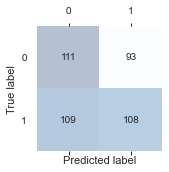

Precision: 0.505
Recall: 0.544
F1: 0.524
Linear SVM _score: 0.48693586698337293
[[165  39]
 [177  40]]


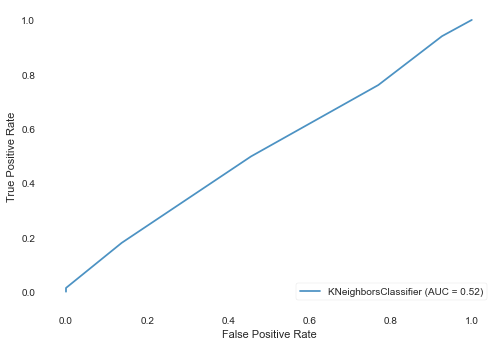

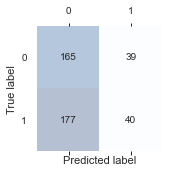

Precision: 0.482
Recall: 0.809
F1: 0.604
RBF SVM _score: 0.5249406175771971
[[127  77]
 [123  94]]


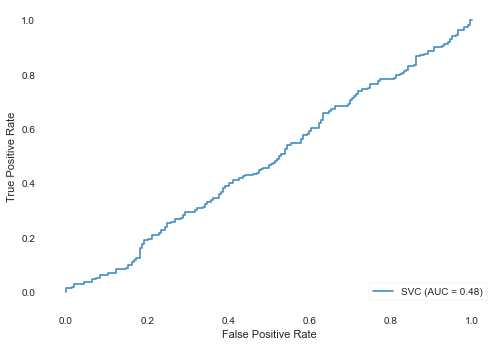

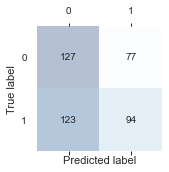

Precision: 0.508
Recall: 0.623
F1: 0.559
Gaussian Process _score: 0.5391923990498813
[[119  85]
 [109 108]]


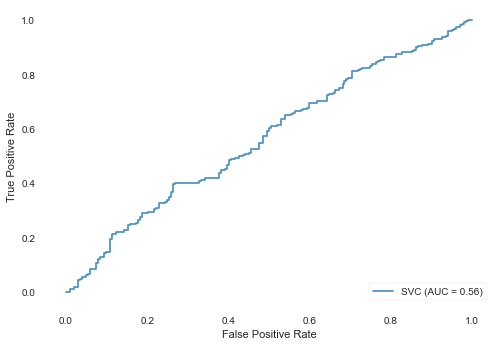

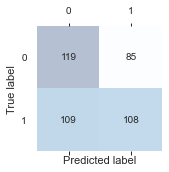

Precision: 0.522
Recall: 0.583
F1: 0.551
Decision Tree _score: 0.5320665083135392
[[130  74]
 [123  94]]


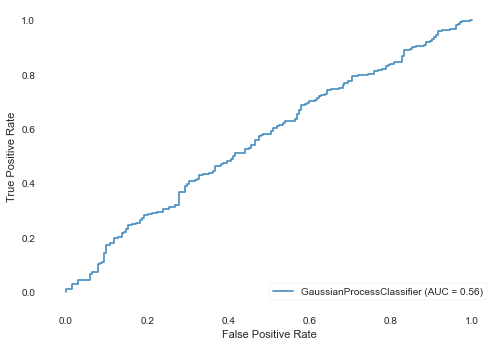

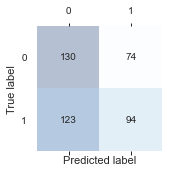

Precision: 0.514
Recall: 0.637
F1: 0.569
Random Forest _score: 0.5368171021377672
[[132  72]
 [123  94]]


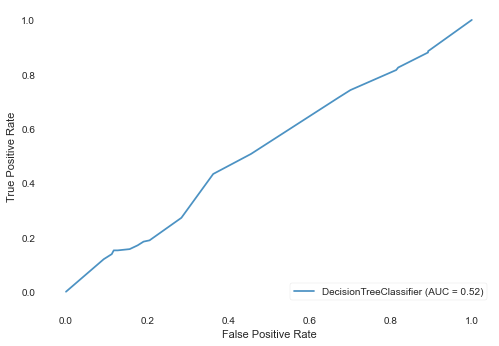

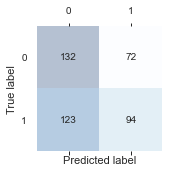

Precision: 0.518
Recall: 0.647
F1: 0.575
Neural Net _score: 0.4679334916864608
[[140  64]
 [160  57]]


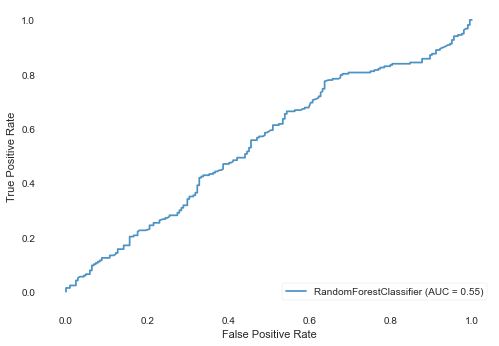

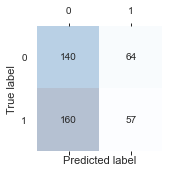

Precision: 0.467
Recall: 0.686
F1: 0.556
AdaBoost _score: 0.48931116389548696
[[117  87]
 [128  89]]


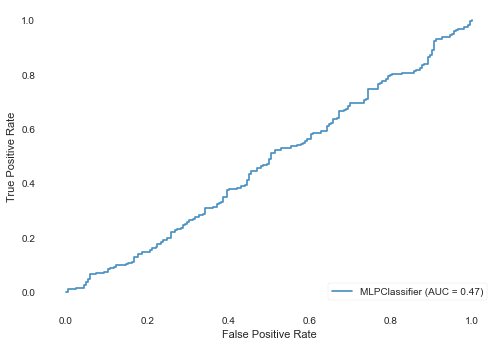

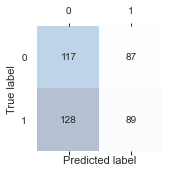

Precision: 0.478
Recall: 0.574
F1: 0.521
Naive Bayes _score: 0.505938242280285
[[ 49 155]
 [ 53 164]]


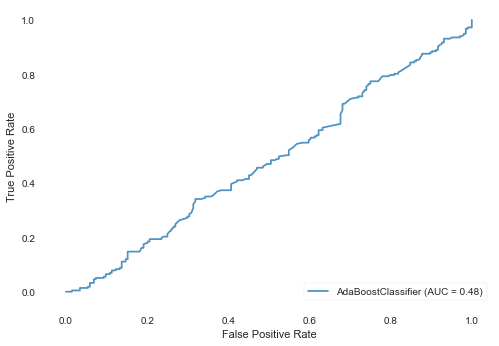

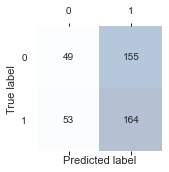

Precision: 0.480
Recall: 0.240
F1: 0.320
QDA _score: 0.49406175771971494
[[ 13 191]
 [ 22 195]]


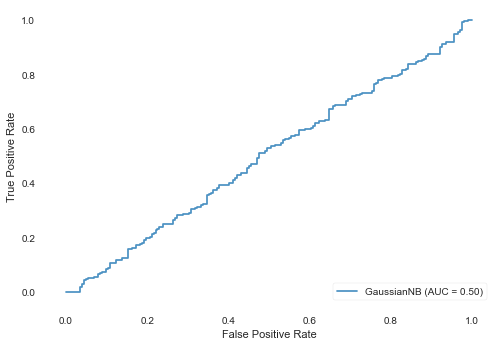

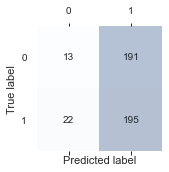

Precision: 0.371
Recall: 0.064
F1: 0.109


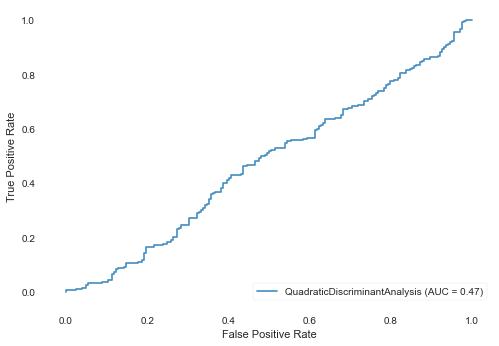

In [43]:
# Tired of running these algorithms one by one, this time we decide to cluster them and run together.
# I provide a snippets(.json) for you, in which you can click the snippets and go through this process easily.

# If your CPU is not fine, you can run this code and have a sleep now. Good night, sweetie！
# How to select ML classifier? It depends. I perfer to select one with the best scores(see matrics).
# How to select the hyper-parameters inside the algorithm functions? Try grid_search(or random_optimize) in cross-validation for tuning.


# model packages
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# evaluation packages and visualization https://scikit-learn.org/stable/visualizations.html
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from scipy import interp
from sklearn.model_selection import StratifiedKFold

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="rbf",gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=8),
    RandomForestClassifier(max_depth=8, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name,'_score:',score)
    y_pred = clf.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    
    # plot confusion matrix
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('images/xxmethod.png', dpi=300)
    plt.show()

    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    
    ax1 = plt.gca()
    clf_disp = plot_roc_curve(clf, X_test, y_test, ax=ax1, alpha=0.8)

    # plot ROC-AUC curve
    
# Here I want to ensemble all the ROC-AUC curve together but I don't find a good way to do that.
# I don't know how to solve this in matplotlib
    
#     fig = plt.figure(figsize=(7, 5))

#     mean_tpr = 0.0
#     mean_fpr = np.linspace(0, 1, 100)
#     all_tpr = []

#     for i, (train, test) in enumerate(cv):
#         probas = clf.fit(X_train_pca[train],
#                             y_train[train]).predict_proba(X_train_pca[test])

#         fpr, tpr, thresholds = roc_curve(y_train[test],
#                                         probas[:, 0],
#                                         pos_label=0)
#         mean_tpr += interp(mean_fpr, fpr, tpr)
#         mean_tpr[0] = 0.0
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr,
#                 tpr,
#                 label='ROC fold %d (area = %0.2f)'
#                       % (i+1, roc_auc))

# plt.plot([0, 1],
#          [0, 1],
#          linestyle='--',
#          color=(0.6, 0.6, 0.6),
#          label='random guessing')

# mean_tpr /= len(cv)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, 'k--',
#          label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
# plt.plot([0, 0, 1],
#          [0, 1, 1],
#          linestyle=':',
#          color='black',
#          label='perfect performance')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.legend(loc="lower right")

# plt.tight_layout()
# # plt.savefig('images/06_10.png', dpi=300)
# plt.show()


It's very disappointing that your model won't give you a good performance about precision rate (only slightly better than 50%). This is life, my honey. You'd better try to find some other advanced models, or to collect more information for this question. You should be glad that you saw such bad predictions in a tutorial, not in your work. I will definitely not show this result to my boss if I get this. 
  
* PS: Actually all these algorithms are capable of multi-classification problems. Beside the y_pred result, you can also get a matrix which displays the possibilities for y_pred in different classes.  

# Unsupervised learning

Now we transfer to another important types of machine learning method: unsupervised learning.  
In supervised learning, we already have the y variable as labels for our prediction model, which will be helpful in training models and give us a easy assess to evaluate there performance. But this time, you're facing a dataset which has plenty of X features but no y for that.  
So here is a question: if I don't have y (which is usually designed as the variable you're interesting in your work), what can I achieve here?  

There are four main types of unsupervised learning method:  
1. Dimension reduction  
2. Clustering  
3. Outlier detection  
4. Association analysis

(and others cutting edge innovations)

Let's see the following scenarios.

### Dimensionality Reduction

In machine learning, to catch useful indicators and obtain a more accurate result, we tend to add as many features as possible at first. However, after a certain point, the performance of the model will decrease with the increasing number of elements. This phenomenon is often referred to as “The Curse of Dimensionality.”  

The curse of dimensionality occurs because the sample density decreases exponentially with the increase of the dimensionality. When we keep adding features without increasing the number of training samples as well, the dimensionality of the feature space grows and becomes sparser and sparser. Due to this sparsity, it becomes much easier to find a “perfect” solution for the machine learning model which highly likely leads to overfitting. To deal with this, you need to consider dimensionality reduction method.

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension.

**Example:**  

Suppose you have a large amount of features, which will be costly if you run some regression or classification(like SVM) models directly. To save the poor memory of your CPU, you have to decrease the number of your X features.  
In previous case we've already seen the PCA and LDA methods. Now let's try something else. 

In [44]:
# Notice at this time, variables like loss and recovery amount are also X features
# I didn't use different symbol when transforming df. Thus, we need to load back original data and do some transforming again, which is stupid for me. Hope you can avoid it.
# If your project is very large, it's important to have a backup and make every step invertible.

df_origin = pd.read_excel('Banking_loss_events.xlsx')
df_origin = df_origin.drop_duplicates()

In [45]:
X_all = np.hstack((X, df_origin[['Recovery Amount','Net Loss','Estimated Gross Loss','Recovery Amount (percent)']]))
X_all = sc_X.fit_transform(X_all)
X_all_column_name = np.hstack((X.columns, ['Recovery Amount','Net Loss','Estimated Gross Loss','Recovery Amount (percent)']))
X_all = pd.DataFrame(X_all, columns=X_all_column_name)

In [46]:
# Manifold Algorith

from sklearn import manifold
from collections import OrderedDict
from functools import partial

n_neighbors = 10          # Trade off between running time and accuracy 
n_components = 2         

LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='dense')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)   # You should always refresh the code when you update sklearn version.
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                         n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                random_state=0)
methods['Modified LLE'] = LLE(method='modified') # It always provides warnings here... Maybe I did miss up something.



for i, (label, method) in enumerate(methods.items()):
    X_DR = method.fit_transform(X_all)
    # Then you can add what you'd like to do in the following.

C:\Users\langbo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [47]:
# Feature Agglomeration
from sklearn import cluster
n_components = 4

agglo = cluster.FeatureAgglomeration(n_clusters=n_components)
agglo.fit(X_all)
X_reduced = agglo.transform(X_all)
print(X_all.shape)
X_reduced.shape

(1401, 50)


(1401, 4)

In [48]:
# Random Projection
from sklearn import random_projection
transformer1 = random_projection.GaussianRandomProjection(n_components=8,eps=0.1)
X_new1 = transformer1.fit_transform(X_all)
print(X_new1.shape)
# If you have large amount of X features compared to samples, you may try to use `eps` to control component_number in output.

transformer2 = random_projection.SparseRandomProjection(n_components=8)
X_new2 = transformer2.fit_transform(X_all)
print(X_new2.shape)

(1401, 8)
(1401, 8)


<div class="alert alert-block alert-danger">  
Note: You might want to explain or visualize the components you get from dimensionality reduction, while sklearn is not a professional package for that. I suggest you to try some better packages in Python.
</div>

### Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.  

Clustering is very important as it determines the intrinsic grouping among the unlabeled data present.  
*Note: There does not exist best criteria to evaluate clustering in real cases. It depends on requirements and the objective criteria from user. However, you can still get some index to describe the results(eg: AMI, ARI) if you want.*  

Besides, clustering is useful for exploring data. If there are many cases and no obvious groupings, clustering algorithms can be used to find natural groupings. Clustering can also serve as a useful data-preprocessing step to identify homogeneous groups on which to build supervised models.

**Example:**  
Suppose you are still working as a data scientist in risk management department. Your boss decides to try to recover the money. He needs to design a strategic system, which will adopt different principles and debt collection plans for different customer groups.   
Your task is to try to construct different groups of debtor customers and to describe some common characteristics. Note that this is different from the classification problem mentioned earlier. Here we do not know the exact categories(y_label) before. Instead, we use our subjective initiative to cluster the similar samples together, then create a classification standard.


In [49]:
# Reference: official sklearn 0.23.2 cases
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

# ============
# set hyperparameters
# ============
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)
spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=params['eps'])
optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])
affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])
average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)
birch = cluster.Birch(n_clusters=params['n_clusters'])
gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')


clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('AgglomerativeClustering', average_linkage),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
    ('Birch', birch),
    ('GaussianMixture', gmm)
)

for name, algorithm in clustering_algorithms:
    algorithm.fit(X_all)
    if hasattr(algorithm, 'labels_'):
        label_pred = algorithm.labels_.astype(np.int)
    else:
        label_pred = algorithm.predict(X_all)
    #You can save the label and do the visualization in the following.

C:\Users\langbo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


### Outlier Detection

Outliers are generally defined as samples that are exceptionally far from the mainstream of data. There is no rigid mathematical definition of what constitutes an outlier; determining whether or not an observation is an outlier is ultimately a subjective exercise.

An outlier may also be explained as a piece of data or observation that deviates drastically from the given norm or average of the data set. An outlier may be caused simply by chance or error, but it may also indicate that god provide a miracle for you.  

Therefore, Outlier Detection may be defined as the process of detecting and subsequently excluding outliers from a given set of data. There are no standardized Outlier identification methods as these are largely dependent upon the data set. You may want to use this method when:  
- you want to detect some errors in the data itself, then check and correct them to improve the accuracy of the model.
- you hope to find the most special ones in a group, i.e., a miracle.
  
*Note:'novelty detection' is a similar method, but it requires the training data to be NOT polluted by outliers. If we are interested in detecting whether a new observation is an outlier, you may check in use of training data through this method. In this context an outlier is also called a novelty.*

**Example:**  

Historical data shows that the bad debts of your bank cannot be recovered, but your boss thinks it is necessary to try it. He hopes to let you find some unique customers who are hopeful of repaying their debts. It will be simple if you have historical repayment data, but you only have this data at present. Therefore, you plan to use the outlier detection method.  

Note that this data set itself contains outliers and there is no need to judge new data points. Therefore, no need for novelty detection method.

In [50]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm

n_samples = len(X_all)
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

for name, algorithm in anomaly_algorithms:
    algorithm.fit(X)
    if name == "Local Outlier Factor":
        y_pred = algorithm.fit_predict(X)
    else:
        y_pred = algorithm.fit(X).predict(X)
    #You can save the label and do the visualization in the following.    

C:\Users\langbo\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:644: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
C:\Users\langbo\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-391.174238417107119 > -396.535428905619938). You may want to try with a higher value of support_fraction (current value: 0.517).
  RuntimeWarning)
C:\Users\langbo\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-393.209786679772208 > -396.295102958589780). You may want to try with a higher value of support_fraction (current value: 0.517).
  RuntimeWarning)
C:\Users\langbo\anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: Run

### Association Analysis

Usually, after you look at the data set carefully, you will find that there are and many frequent patterns (high correlated) between your X features. For example, the rule `{onions ,potatoes}-> {hamburger meat}` found in the sales data of a supermarket would indicate that: **if a customer buys onions and potatoes together, he or she is likely to also buy hamburger meat**. Such information can be used as the basis for decisions about marketing activities (e.g., promotional pricing or product placements). In addition to the above example from market basket analysis, association rules are employed today in many application areas including Web usage mining, intrusion detection and bioinformatics.  

You may find three types of associations in this algorithm:
- Frequent itemset (For parallel data and obtain simultaneous correlation)
- Frequent sequence (Require raw data to occur in order, such as multiple time series; obtain relationships like 'cause and effect' )
- Frequent substructure (Mining common substructures, which are composed of the above two association relationships)  

*Note: It is hard to implement association analysis is continuous numeric variable. Is the case we listed below, we use the famous `apriori` algorithms, which requires your input to be either 0/False or 1/True. If you want to add more information, please try to dichotomize your continuous features.*  

You can see tutorial for more: https://www.csd.uwo.ca/~dlizotte/teaching/cs886_slides/s13/DataMiningCS886.pdf

**Example:**  

You have a new boss who wants to hear your report on this data, but he has no clear purpose. He has given you enough freedom and hopes that you can actively discover some information for him, and tolerate some useless attempts.  

In this case, association analysis is a good choice. Since our data set has no chronological relationship, we only need to mine frequent itemset. The code demonstrated below uses the `mlxtend` package, you can also try others, such as `PySpark`.  

In [51]:
X_dummy = df_ml[['Name Class','Region_Asia Pac', 'Region_EMEA', 'Region_North America',
       'Business_Agency Services', 'Business_Asset Management',
       'Business_Commercial Banking', 'Business_Corporate Finance',
       'Business_Retail Banking', 'Business_Retail Brokerage',
       'Business_Trading and Sales', 'Status_Approved', 'Status_In Progress',
       'Status_Not Started', 'Status_Rejected', 'Status_Under Review',
       'Risk Category_Business Disruption and System Failures',
       'Risk Category_Clients, Products and Business Practices',
       'Risk Category_Damage to Physical Assets',
       'Risk Category_Employment Practices and Workplace Safety',
       'Risk Category_Execution, Delivery and Process Management',
       'Risk Category_External Fraud', 'Risk Category_Internal Fraud',
       'Risk Sub-Category_Advisory Activities',
       'Risk Sub-Category_Customer Intake and Documentation',
       'Risk Sub-Category_Customer/Client Account Management',
       'Risk Sub-Category_Disaster and other events',
       'Risk Sub-Category_Diversity and Discrimination',
       'Risk Sub-Category_Employee Relations',
       'Risk Sub-Category_Improper Business or Market Practices',
       'Risk Sub-Category_Infrastructure and Systems',
       'Risk Sub-Category_Product Flaws',
       'Risk Sub-Category_Reporting and Disclosure',
       'Risk Sub-Category_Safe Environment',
       'Risk Sub-Category_Selection, Sponsorship and Exposure',
       'Risk Sub-Category_Suitability, Disclosures and Fiduciary',
       'Risk Sub-Category_Systems Security',
       'Risk Sub-Category_Theft and Fraud',
       'Risk Sub-Category_Trade Counterparties',
       'Risk Sub-Category_Transaction/Data Management',
       'Risk Sub-Category_Unauthorized Activity',
       'Risk Sub-Category_Vendors and Suppliers',
       'Risk Sub-Category_Willful Damage']]

from mlxtend.frequent_patterns import apriori
 
frequent_itemsets = apriori(X_dummy,min_support=0.05,use_colnames=True) # 'use_colnames=True' shows labels of features
# frequent_itemsets = apriori(X_dummy,min_support=0.05)
frequent_itemsets.sort_values(by='support',ascending=False,inplace=True) # Frequent itemsets can be sorted by support
print(frequent_itemsets[frequent_itemsets.itemsets.apply(lambda x: len(x)) >= 2])  # Select frequent itemsets with length >=2

from mlxtend.frequent_patterns import association_rules
 
association_rule = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.9)
association_rule.sort_values(by='leverage',ascending=False,inplace=True)    # Association rules can be sorted by leverage
print(association_rule)

      support  \
66   0.363312   
25   0.323340   
88   0.304069   
48   0.301213   
69   0.297645   
..        ...   
153  0.051392   
57   0.051392   
111  0.051392   
134  0.051392   
119  0.051392   

                                                                                        itemsets  
66                                       (Business_Retail Banking, Risk Category_External Fraud)  
25                                                         (Business_Retail Banking, Name Class)  
88                             (Risk Category_External Fraud, Risk Sub-Category_Theft and Fraud)  
48                                               (Business_Retail Banking, Region_North America)  
69                                  (Business_Retail Banking, Risk Sub-Category_Theft and Fraud)  
..                                                                                           ...  
153   (Risk Sub-Category_Theft and Fraud, Risk Category_External Fraud, Region_EMEA, Name Class)  
57 

### Generative Adversarial Networks (GAN)

Generative Adversarial Networks, or GANs for short, are an cutting-edge approach to generative modeling using deep learning methods, such as convolutional neural networks.  

Generative modeling is an unsupervised learning task in machine learning that involves automatically discovering and learning the regularities or patterns in input data in such a way that the model can be used to generate or output new examples that plausibly could have been drawn from the original dataset. 

GANs are a clever way of training a generative model by framing the problem as a supervised learning problem with two sub-models: the generator model that we train to generate new examples, and the discriminator model that tries to classify examples as either real (from the domain) or fake (generated). The two models are trained together in a zero-sum game, adversarial, until the discriminator model is fooled about half the time, meaning the generator model is generating plausible examples.  

Here is a more detailed introduction for GAN:
https://indico.cern.ch/event/655447/contributions/2742176/attachments/1551254/2437141/gan-intro-iml.pdf 

GAN cannot be easily implemented in sklearn. So we use `TGAN` package here. You may also use Pytorch, TensorFlow-GAN or other packages.  


**Example:**  

Suppose your boss is forced to submit at least **1,500** pieces of data that are not duplicated due to evaluation requirements, and you currently only collect **1,400** pieces. Now your boss asks you to help him make up additional **100** samples, otherwise you will lose your job. In order to feed your family, you have to submit to him.  

Considering that replication-based methods (such as up-sampling, bootstrap) will be easily discovered, you decide to use the GAN algorithm to accomplish this task, which is really appropriate in this situation.

In [52]:
continuous_columns = X_all.columns

In [53]:
# # The following code will cost you two hours
# from tgan.model import TGANModel

# tgan = TGANModel(continuous_columns, max_epoch=2, steps_per_epoch=500,save_checkpoints=True,
#             restore_session=True,
#             batch_size=200,
#             z_dim=200,
#             noise=0.2,
#             l2norm=0.00001,
#             learning_rate=0.001,
#             num_gen_rnn=100,
#             num_gen_feature=100,
#             num_dis_layers=1,
#             num_dis_hidden=100,
#             optimizer='GradientDescentOptimizer'
#        )

# tgan.fit(X_all)
# num_samples = 1500
# samples = tgan.sample(num_samples)

# model_path = 'GANmodels/mymodel.pkl'
# tgan.save(model_path,force=True)

# samples.to_csv('GAN_Fake_data')

In [54]:
# It didn't work due to the kernel packages version error(intrinic bug). I may try other methods to update it.

# Semi-Supervised Learning

Interestingly, as a data scientist, you may face the following situation in real world: Not every data has the correct label classification, or there is no way to make critical judgments at the moment. Marked samples are difficult to obtain(need specialized personnel, special equipment, additional expenses, etc) while unlabeled samples are relatively cheap.    

Semi-supervised learning is an approach to machine learning that combines a small amount of labeled data with a large amount of unlabeled data during training. Semi-supervised learning falls between unsupervised learning (with no labeled training data) and supervised learning (with only labeled training data).  

Semi-supervised learning may refer to either transductive learning or inductive learning. The goal of transductive learning is to infer the correct labels for the given unlabeled data ${\displaystyle x_{l+1},\dots ,x_{l+u}} x_{l+1},\dots ,x_{l+u}$ only. The goal of inductive learning is to infer the correct mapping from ${\displaystyle X} $ to ${\displaystyle Y} $.  

Unlabeled data, when used in conjunction with a small amount of labeled data, can produce considerable improvement in learning accuracy. The acquisition of labeled data for a learning problem often requires a skilled human agent (e.g. to transcribe an audio segment) or a physical experiment (e.g. determining the 3D structure of a protein or determining whether there is oil at a particular location). The cost associated with the labeling process thus may render large, fully labeled training sets infeasible, whereas acquisition of unlabeled data is relatively inexpensive. In such situations, semi-supervised learning can be of great practical value. Semi-supervised learning is also of theoretical interest in machine learning and as a model for human learning.   

**Example:**  

Suppose you are detecting whether the `recovery amount (percent)` is bigger than 30%. You are given a data with the bottom 70% of the labels $y$ are missing (I know you have it now, suppose you don't). Your mission is to create a model, which predicts all the labels and can also be used to predict new data in the future.  

Since you can use two types of data, you may easily recognize that it is a task suitable for semi-supervised learning. You can choose Label Spreading algorithm in `sklearn.semi_supervised` package as we did in the following:


In [55]:
from sklearn.semi_supervised import LabelSpreading

rng = np.random.RandomState(0)

print(X_back)  # X_features in this task 
print(y)       # y label we need to predict

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1
# we create an instance of SVM and fit out data.
ls30 = (LabelSpreading().fit(X_back, y_30), y_30)
ls50 = (LabelSpreading().fit(X_back, y_50), y_50)

# You may also conduct models of label propagation and supervised learning under perfect information, if you want some contrast
ls100 = (LabelSpreading().fit(X_back, y), y)
rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X_back, y), y)


      Discovery Date      Year  timediff  Name Class  Region_Asia Pac  \
0          -1.997944 -1.795294  0.041059   -0.973930        -0.526421   
1          -1.995514 -1.795294  0.053425   -0.973930        -0.526421   
2          -1.994299 -1.795294  0.053425   -0.973930         1.899619   
3          -1.989440 -1.795294  0.065790   -0.973930        -0.526421   
4          -1.984580 -1.795294  0.053425   -0.973930        -0.526421   
...              ...       ...       ...         ...              ...   
1396        1.051343  0.885211  0.053425    1.026768        -0.526421   
1397        1.136383  1.331962  0.041059    1.026768        -0.526421   
1398        1.206845  1.331962  0.065790    1.026768        -0.526421   
1399        1.313752  1.331962  0.041059    1.026768         1.899619   
1400        1.443742  1.331962  0.041059    1.026768        -0.526421   

      Region_EMEA  Region_North America  Business_Agency Services  \
0        1.441916             -0.919701               

C:\Users\langbo\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
C:\Users\langbo\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


# Reinforcement Learning

You may hear about cake-eating problem, Bewley-Huggett-Aiyagari models or Bellman equation in dynamic programming for macroeconomics. The problem to be solved by reinforcement learning is very similar, or in other words, they are largely the same way of solving sequential game of interaction with environment.  

Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment in order to maximize the notion of cumulative reward. Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.  

Reinforcement learning differs from supervised learning in not needing labelled input/output pairs be presented, and in not needing sub-optimal actions to be explicitly corrected. Instead the focus is on finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).  

The environment is typically stated in the form of a Markov decision process (MDP), because many reinforcement learning algorithms for this context utilize dynamic programming techniques. The main difference between the classical dynamic programming methods and reinforcement learning algorithms is that the latter do not assume knowledge of an exact mathematical model of the MDP and they target large MDPs where exact methods become infeasible.   

Reinforcement learning is an interdisciplinary subject and it is widely used in many fields.

In [56]:
IFrame('images/Reinforcement Learning.bmp',width=500, height=500)

Although the algorithm has defeated the world champion of Go, reinforcement learning is not widely used in industry. Reinforcement learning is widely used in macroeconomics dynamic programming, therefore I think you should at least know a little. As sklearn does not provide related methods, you may try these python package in different scenarios: Keras-RL, Keras-RL2, OpenAI, Stable Baselines, Acme. I will show an example to illustrate one of its application scenarios, but to carry it out is far more beyond the scope of this tutorial.    

**Example:**   

Finally, the bank securitized these junk assets and sold them on the market. In the end, the bank securitized these junk assets and sold them on the market. Each asset has one unit with the quotation is \\$0.3, which is the median of recovery rate. The characteristics of these garbage assets are public, but all the information related to recovery is private.  

Assume you are a buyer with \\$150 principal. You will select from 1 to 1,400 assets in order and form an investment portfolio. Finally, the recovery amount you get minus your costs is the net investment income. Your goal is to find as many assets with a recovery amount higher than \\$0.3 as possible and maximize your capital. You will get your net income after all of your decisions. You can also leave a portion of the principal so that they will be included in final capital.  

$$ 150 = I + S $$
$$ \pi = \sum_{k=1} R_k - I $$
$$ K = \pi + S $$
$$ \max{K}$$ 
$$ st: X $$ 


Where $I$ is investing, $S$ is saving, $\pi$ is net income $K$ is capital, X is the public information you get (with no recovery related message).  
    
You can build a reinforcement learning model in following algorithms to find the optimal policy through multiple interactions with the environment. In the end, your model will estimate the approximate income of each asset.

In [57]:
IFrame('images/RL_Algorithm.bmp',width=900, height=500)

# *Deep Learning

Let us talk a little bit about deep learning, which is currently very popular in computer science academy.  

Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.  

Deep learning architectures such as `deep neural networks`, `deep belief networks`, `recurrent neural networks` and `convolutional neural networks` have been applied to fields including computer vision, machine vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.   

In general, deep learning is a back-end technology rather than a front-end. We are here. You can apply deep learning algorithms to enhance all the machine learning methods we have talked about before (some are listed in the previous examples) and get better results.    

# *Another idea: Bayesian Analysis in PyMC3

## Introduction
**Bayesian analysis**  
It is a method of statistical inference (named for English mathematician Thomas Bayes) that allows one to combine prior information about a population parameter with evidence from information contained in a sample to guide the statistical inference process.  

A key, and somewhat controversial, feature of Bayesian methods is the notion of a probability distribution for a population parameter. According to classical statistics, parameters are constants and cannot be represented as random variables. Bayesian proponents argue that, if a parameter value is unknown, then it makes sense to specify a probability distribution that describes the possible values for the parameter as well as their likelihood. The Bayesian approach permits the use of objective data or subjective opinion in specifying a prior distribution. With the Bayesian approach, different individuals might specify different prior distributions. Classical statisticians argue that for this reason Bayesian methods suffer from a lack of objectivity. Bayesian proponents argue that the classical methods of statistical inference have built-in subjectivity (through the choice of a sampling plan) and that the advantage of the Bayesian approach is that the subjectivity is made explicit.

**Compare Bayesian Analysis to Machine Learning**   
We can distinguish statistical modeling, classical machine learning and modern machine learning by the role of the data.

In statistical modeling(like Bayesian method), the data guide us to the selection of a stochastic model which serves as the abstraction for making probabilistic statements about questions of interest, such as hypotheses, predictions and forecasts.

In classical machine learning, the data drive the selection of the analytic technique to best perform the task at hand. The data trains the algorithms.

In modern machine learning, the data drive systems based on neural nets that self-determine the regularities in the data in order to learn a task. The process of training the neural network on the data learns the task. As someone put it, "The data does the programming."   
(Reference: https://www.linkedin.com/pulse/difference-between-statistical-modeling-machine-i-see-schabenberger)

**Implement Bayesian method in PyMC3**  
Here are the common steps we will use in the following model. You can always try different patterns.  
1. Describe your model and draw analysis process.  
2. Build your model
    - First part: with pm.Model() as Your_model: #Build a model framework   
    - Second part:create stochastic variables with prior distributions   
    - The third part describes the likelihood, that is, the relationship between the variables we can observe and the prior parameters  
3. Select sampling times, sampling method and initial point and start inference  
4. Visual or quantitative analysis to summarize and evaluate the posterior  
5. Make decisions based on loss function and posterior  

(Reference: https://docs.pymc.io/notebooks/getting_started.html 

https://github.com/PacktPublishing/Bayesian-Analysis-with-Python/blob/master/Chapter%203/03_Juggling%20with%20multiparametric%20and%20Hierarchical%20models.ipynb)

## Modeling for single data

**Example:**  
Your boss is not very satisfied with the previous machine learning regression model. He now wants you to extract information from the recovery rate (i.e., recovery amount (percent)) alone. He hopes that you can give a certain probability value for the range of variation he provides.  

This requires you to use statistical modeling methods to estimate the distribution of a single variable, and use this to complete subsequent work. You decide to use Bayesian methods to accomplish this task.

In [89]:
#用贝叶斯展示所有违约率曲线分布，找图形模拟一下；再尝试注入一个主观先验的情景；单变量描绘的混合模型；高斯核函数模拟
#图像断点分析 book2例子，

import pymc3 as pm
from scipy import stats
import seaborn as sns
import arviz as az

palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

y = df_ml['Recovery Amount (percent)']
y

index
0       28.0
1       31.0
2       26.0
3       25.0
4       31.0
        ... 
1396    30.0
1397    35.0
1398    22.0
1399     8.0
1400     8.0
Name: Recovery Amount (percent), Length: 1401, dtype: float64

### Gaussian Inferences

C:\Users\langbo\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  # This is added back by InteractiveShellApp.init_path()


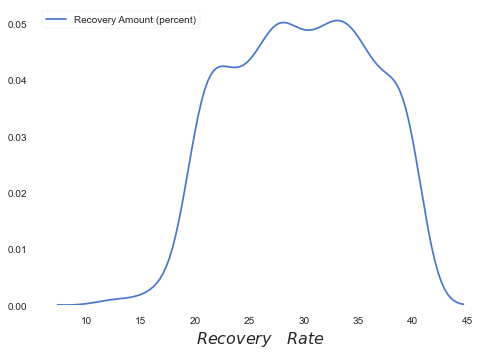

In [92]:
# Remove outliers using the interquartile rule(depends on requirements)
quant = np.percentile(y, [25, 75])
iqr = quant[1] - quant[0]
upper_b = quant[1] + iqr * 1.5
lower_b = quant[0] - iqr * 1.5
y_clean = y[(y > lower_b) & (y < upper_b)]

# Plot Kernel Density Estimation
sns.kdeplot(y_clean)
plt.xlabel('$Recovery \quad Rate$', fontsize=16)
plt.savefig('RecoveryRate.png', dpi=300, figsize=(5.5, 5.5))

You can see a very obvious central tendency, so we naturally thought of fitting it with a Gaussian distribution.     

We don't know the mean and variance of the Gaussian distribution, so we need to set a prior for it. We use the following statistical model:

$$ \mu  \sim  Uniform(l,h) $$
$$ \sigma  \sim  HalfNormal(\sigma_\sigma) $$
$$ y  \sim  Normal(\mu,\sigma) $$  

** However, you can also see that the high probability area (in the middle of the image) is too wide, so the fitting result will not be particularly good. We will improve it later.*

In [97]:
with pm.Model() as model_g:
    mu = pm.Uniform('mu', lower=5, upper=60)
    sigma = pm.HalfNormal('sigma', sd=5)
    y_clean = pm.Normal('y_clean', mu=mu, sd=sigma, observed=y)
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]


Sampling 2 chains for 1_000 tune and 1_100 draw iterations (2_000 + 2_200 draws total) took 128 seconds.


C:\Users\langbo\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

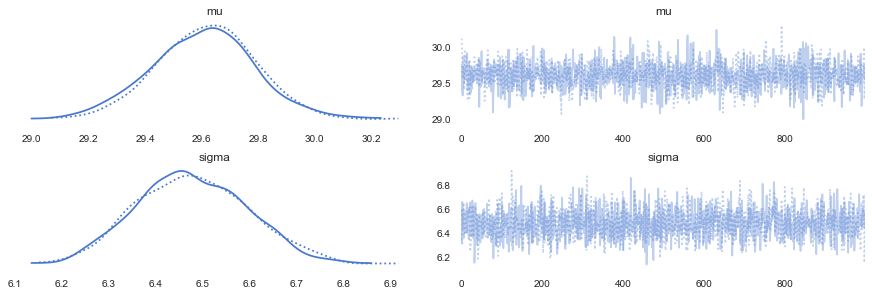

In [98]:
chain_g = trace_g[100:]
pm.traceplot(chain_g)

In [99]:
pm.summary(chain_g)

C:\Users\langbo\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,29.61,0.17,29.27,29.93,4.00e-03,3.00e-03,1609.0,1607.0,1606.0,1233.0,1.0
sigma,6.48,0.12,6.25,6.69,3.00e-03,2.00e-03,1824.0,1817.0,1806.0,1601.0,1.0


In [ ]:
y_pred = pm.sample_posterior_predictive(chain_g, 100, model_g, size=len(df))

In [110]:
y_pred

{'y_clean': array([[[31.22, 42.67, 30.99, ..., 23.03, 34.83, 33.92],
         [22.9 , 23.25, 32.4 , ..., 29.25, 25.36, 37.15],
         [33.08, 38.27, 42.68, ..., 18.13, 24.81, 23.12],
         ...,
         [19.55, 25.74, 16.5 , ..., 25.48, 41.48, 18.52],
         [32.78, 36.  , 33.43, ..., 22.93, 27.32, 27.25],
         [20.98, 28.76, 33.22, ..., 30.34, 25.06, 31.14]],
 
        [[35.63, 20.96, 15.59, ..., 27.81, 32.74, 27.31],
         [20.27, 36.11, 23.42, ..., 35.38, 31.93, 33.27],
         [31.5 , 24.22, 22.59, ..., 35.9 , 37.66, 26.1 ],
         ...,
         [28.3 , 34.14, 24.87, ..., 27.01, 25.07, 31.53],
         [35.68, 32.48, 39.07, ..., 18.96, 31.44, 28.02],
         [24.35, 36.68, 38.9 , ..., 31.28, 26.46, 31.33]],
 
        [[31.35, 23.79, 22.76, ..., 33.44, 30.31, 35.13],
         [25.61, 34.5 , 32.19, ..., 27.57, 37.58, 34.96],
         [29.03, 35.19, 24.42, ..., 23.62, 31.92, 27.45],
         ...,
         [32.45, 34.86, 27.11, ..., 35.41, 22.79, 20.83],
         [42.

ValueError: too many values to unpack (expected 2)

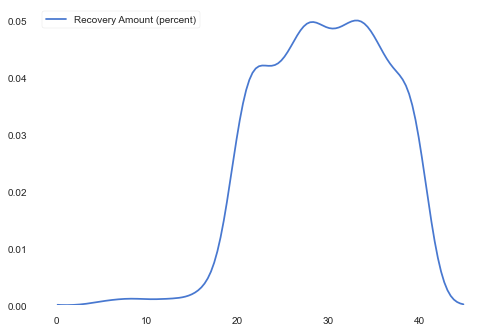

In [111]:
sns.kdeplot(y, color='b')
for i in y_pred['y_clean']:
    sns.kdeplot(i, color='r', alpha=0.1)
plt.title('Gaussian model', fontsize=16)
plt.xlabel('$Recovery \quad Rate$', fontsize=16)

# Another way to plot this graph
# with model_g:
#     ppc = pm.sample_posterior_predictive(
#         chain_g, var_names=["mu", "sigma", "y_clean"], random_seed=58
#     )
    
# idata = az.from_pymc3(chain_g, posterior_predictive=ppc)
# az.plot_ppc(idata);

## Multivariate modeling

### Comparison between groups

**Example:**  
Your boss is still interested in the recovery rate, but he wants to know more from the data. He wants you to compare the trend of recovery rate over the years.    

Therefore, you decide to group the y variable according to the year variable for comparison between groups. After that, you will build a hierarchical model to increase robustness.

In [112]:
df_ml

,Discovery Date,Year,Net Loss,Recovery Amount (percent),timediff,Name Class,Region_Asia Pac,Region_EMEA,Region_North America,Business_Agency Services,...,"Risk Sub-Category_Selection, Sponsorship and Exposure","Risk Sub-Category_Suitability, Disclosures and Fiduciary",Risk Sub-Category_Systems Security,Risk Sub-Category_Theft and Fraud,Risk Sub-Category_Trade Counterparties,Risk Sub-Category_Transaction/Data Management,Risk Sub-Category_Unauthorized Activity,Risk Sub-Category_Vendors and Suppliers,Risk Sub-Category_Willful Damage,Recovery Amount (percent)_bin
index,,,,,,,,,,,,,,,,,,,,,
0,1.17e+18,2007,296555.27,28.0,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,1.17e+18,2007,87472.47,31.0,2.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
2,1.17e+18,2007,229395.38,26.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,1.17e+18,2007,137925.29,25.0,3.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,1.17e+18,2007,292160.41,31.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1.38e+18,2013,952743.86,30.0,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.0
1397,1.39e+18,2014,122813.21,35.0,1.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.0
1398,1.40e+18,2014,949052.11,22.0,3.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.0


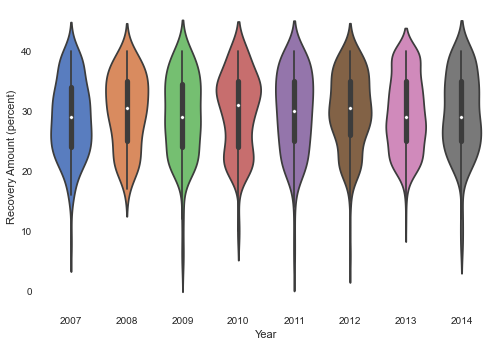

In [114]:
# Here we only focus on df_ml['Year'] and df_ml['Recovery Amount (percent)']
sns.violinplot(x='Year', y='Recovery Amount (percent)', data=df_ml);

In [ ]:
# Note that we transfer df_ml['Year'] as indexes
y = df_ml['Recovery Amount (percent)'].values
x = pd.Categorical(df_ml['Year']).codes

In [ ]:
with pm.Model() as comparing_groups:        
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(x)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(x)))

    y = pm.Normal('y', mu=means[x], sd=sds[x], observed=y)
    # No bother for loop. We can just implace the function parameters in vectors.
    trace_cg = pm.sample(5000)

In [113]:
chain_cg = trace_cg[100::]
pm.traceplot(chain_cg);

In [ ]:
pm.df_summary(chain_cg)

In [ ]:
dist = dist = stats.norm()

_, ax = plt.subplots(3, 2, figsize=(16, 12))

comparisons = [(i,j) for i in range(4) for j in range(i+1, 4)]
pos = [(k,l) for k in range(3) for l in (0, 1)]

for (i, j), (k,l) in zip(comparisons, pos):
    means_diff = chain_cg['means'][:,i]-chain_cg['means'][:,j]
    d_cohen = (means_diff / np.sqrt((chain_cg['sds'][:,i]**2 + chain_cg['sds'][:,j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
        
    pm.plot_posterior(means_diff, ref_val=0, ax=ax[k, l], kde_plot=True, lw=2)
    ax[k, l].plot(0, label="Cohen's d = {:.2f}\nProb sup = {:.2f}".format(d_cohen, ps) ,alpha=0)
    ax[k, l].set_xlabel('$\mu_{}-\mu_{}$'.format(i, j), fontsize=18)
    ax[k,l ].legend(loc=0, fontsize=14)
plt.tight_layout()

### Hierarchical model  

We use the following statistical model:    

$$ \alpha \sim HalfCauchy(\beta_\alpha) $$
$$ \beta \sim HalfCauchy(\beta_\beta) $$
$$ \theta \sim Beta(\alpha,\beta) $$
$$ y \sim Bern(\theta) $$

In [ ]:
with pm.Model() as model_h:
    alpha = pm.HalfCauchy('alpha', beta=10)
    beta = pm.HalfCauchy('beta', beta=10)
    
    theta = pm.Beta('theta', alpha, beta, shape=len(df_ml))
    y = pm.Bernoulli('y', p=theta[x], observed=y)

    trace_h = pm.sample(2000)

In [ ]:
chain_h = trace_h[200:]
pm.traceplot(chain_h)

In [60]:
pm.df_summary(chain_h)

### Multivariate Linear Regression

I hope you feel familiar when you read this. We have implemented some of the Bayesian method in sklearn before. Now we will use PyMC3 statements to show another method and redo the process.  

However, PyMC3 is more professional than sklearn in Bayesian statistics, so you will have more operable commands and professional output results this time.

In [115]:
# Let's recall the X and y we refined before:
X_back

,Discovery Date,Year,timediff,Name Class,Region_Asia Pac,Region_EMEA,Region_North America,Business_Agency Services,Business_Asset Management,Business_Commercial Banking,...,Risk Sub-Category_Safe Environment,"Risk Sub-Category_Selection, Sponsorship and Exposure","Risk Sub-Category_Suitability, Disclosures and Fiduciary",Risk Sub-Category_Systems Security,Risk Sub-Category_Theft and Fraud,Risk Sub-Category_Trade Counterparties,Risk Sub-Category_Transaction/Data Management,Risk Sub-Category_Unauthorized Activity,Risk Sub-Category_Vendors and Suppliers,Risk Sub-Category_Willful Damage
0,-2.00,-1.80,0.04,-0.97,-0.53,1.44,-0.92,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,-0.24,-0.05
1,-2.00,-1.80,0.05,-0.97,-0.53,-0.69,1.09,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,3.24,-0.17,-0.13,-0.24,-0.05
2,-1.99,-1.80,0.05,-0.97,1.90,-0.69,-0.92,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,-0.24,-0.05
3,-1.99,-1.80,0.07,-0.97,-0.53,1.44,-0.92,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,-0.24,-0.05
4,-1.98,-1.80,0.05,-0.97,-0.53,-0.69,1.09,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,-0.24,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1.05,0.89,0.05,1.03,-0.53,1.44,-0.92,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,4.09,-0.05
1397,1.14,1.33,0.04,1.03,-0.53,1.44,-0.92,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,4.09,-0.05
1398,1.21,1.33,0.07,1.03,-0.53,-0.69,1.09,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,4.09,-0.05
1399,1.31,1.33,0.04,1.03,1.90,-0.69,-0.92,-0.18,-0.15,-0.32,...,-0.18,-0.1,-0.1,-0.34,-0.69,-0.31,-0.17,-0.13,4.09,-0.05


In [125]:
y_reg = pd.DataFrame(y)
y_reg

,Recovery Amount (percent)
index,
0,28.0
1,31.0
2,26.0
3,25.0
4,31.0
...,...
1396,30.0
1397,35.0
1398,22.0


In [ ]:
with pm.Model() as model_mlr:
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = alpha_tmp + pm.math.dot(beta, X_back)

    alpha = pm.Deterministic('alpha', alpha_tmp) 

    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=yy_reg)

    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_mlr = pm.sample(5000, step=step, start=start)

In [ ]:
pm.traceplot(trace_mlr, ['alpha', 'beta','epsilon'])

In [61]:
pm.df_summary(trace_mlr, ['alpha', 'beta','epsilon'])

### Multivariate Logistic Regression  

Again, we have done similar work in sklearn before. This time we will try the multi-label classification problem.  

**Example:**  
Assuming that the current threshold for distinguishing asset ratings is changed to three grades, whose corresponding two demarcation points are 25 and 35. We train the model again to analyze it.  

In [127]:
y_cat = np.copy(y_reg)
y_cat[y_cat<25] = 0
y_cat[y_cat>35] = 2
y_cat[y_cat>=25] = 1
y_cat = pd.Categorical(y_cat).codes
y_cat

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [62]:
#多元逻辑回归

#softmax回归，广义多类别

#完备性检查

In [63]:
#带混合项的logistic回归

In [64]:
#建立一个贝叶斯老虎机问题

 # Summary

We have roughly understood some basic properties and application scenarios of machine learning and Bayesian methods. Although your current level of understanding and programming may not be enough to support your use of them in your thesis analysis, one day you will apply them to your thesis.  

I hope you have generally understood the general steps in variety of machine learning projects.   
We provide examples of three difficulty levels, you can find and run them in other folders.   


Have fun, stay healthy and live a happy life.

# Reference

https://wp-en.wikideck.com/  
https://scikit-learn.org/